In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('churn_modified.csv')
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


# Setting X and Y and training the model

In [4]:
X = df.drop(columns = ["Churn"])
y = df["Churn"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.07,
                                 random_state=42,
                                 max_features=8 )

In [7]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.07, max_features=8, n_estimators=300,
                           random_state=42)

In [8]:
y_pred = gbc.predict(X_test)

In [9]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.804070042593469


# Prediction using user input data

In [10]:
user_data = np.array([[0,0,1,1,69,1,2,1,2,2,2,2,2,2,2,0,1,113.25]])
prediction = gbc.predict(user_data)

print("Prediction for the above data point is: ", prediction[0])

Prediction for the above data point is:  0


# Cross Validation

In [11]:
from sklearn.model_selection import KFold, cross_val_score

In [12]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(gbc, X, y, cv = k_folds)

In [13]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.8105039  0.80979418 0.79134138 0.79829545 0.79474432]
Average CV Score:  0.8009358466675269


# Classification Report

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.68      0.52      0.59       574

    accuracy                           0.80      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



# Confusion Matrix

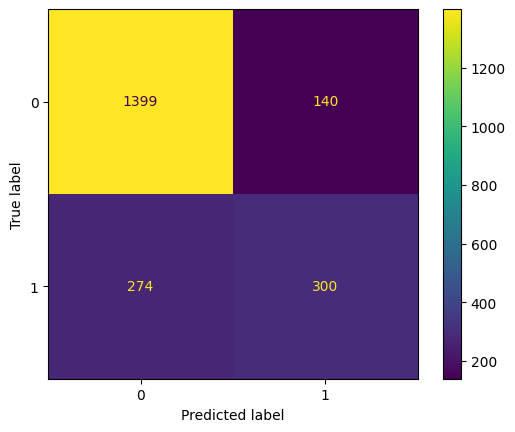

In [15]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Precision and Recall

In [16]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Precision: 0.6818181818181818
Recall: 0.5226480836236934


In [17]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(gbc, X, y, cv=10)
y_scores = cross_val_predict(gbc, X,y, cv=10, method="decision_function")

# Precision v/s Recall Curve

In [18]:
from sklearn.metrics import precision_recall_curve
precisions,recalls, thresholds = precision_recall_curve(y, y_scores)

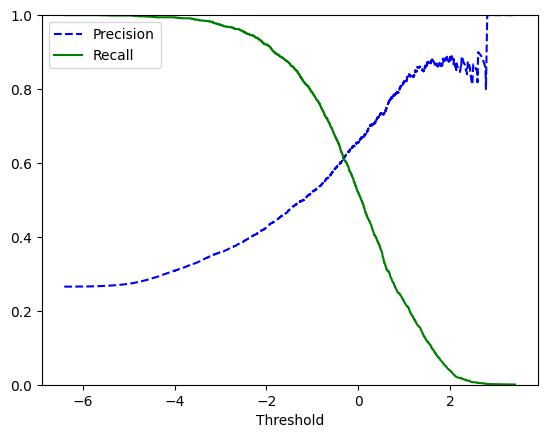

In [19]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# Precision v/s Recall Graph

Text(0, 0.5, 'Precision')

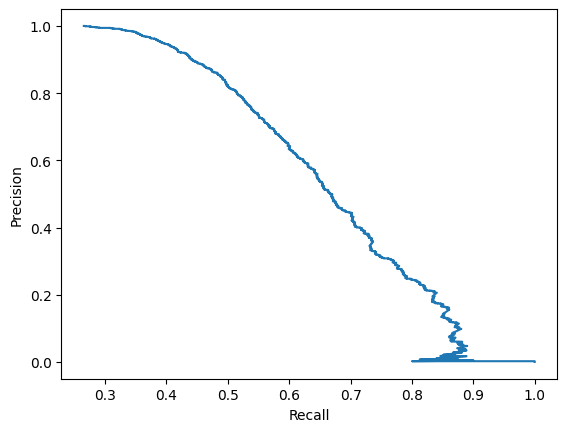

In [20]:
plt.plot(precisions, recalls)
plt.xlabel("Recall")
plt.ylabel("Precision")

# New Precision and Recall

In [21]:
y_new_scores = (y_scores > -0.3)
print("New Precision: ", precision_score(y, y_new_scores))
print("New Recall: ", recall_score(y, y_new_scores))

New Precision:  0.6151761517615176
New Recall:  0.6072766185125735


# ROC Curve

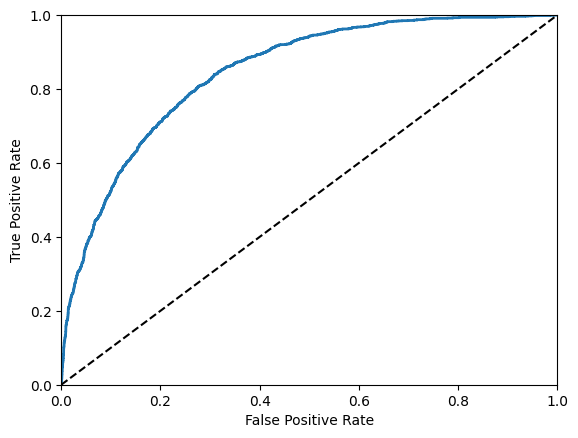

In [22]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
plot_roc_curve(fpr,tpr)
plt.show()

# ROC AUC Score

In [25]:
from sklearn.metrics import roc_auc_score
print("ROC and AUC score is: ", roc_auc_score(y, y_scores))

ROC and AUC score is:  0.8451788410712243
